In [141]:
# install the needed libraries
!pip uninstall tensorflow -y
!pip install tensorflow-macos==2.10.0
!pip install google-cloud


In [35]:
#Import the Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

# Change the names of the photos and sketches before regrouping the 3 datasets

## Change names for dataset 1 (photos and sketches)

In [119]:
# Define photo1 and sketch 1 path names 
photo_path_1 =os.path.join(os.getcwd(),"..","raw_data","photo","photo1")
sketch_path_1 =os.path.join(os.getcwd(),"..","raw_data","sketch","sketch1")

#Create two lists of the filenames in the corresponding paths and sort them
photo_list_1 = os.listdir(photo_path_1)
photo_list_1.sort()

sketch_list_1 = os.listdir(sketch_path_1)
sketch_list_1.sort()

In [121]:
#check the lengths of the 2 lists
len(photo_list_1), len(sketch_list_1)

(1529, 1529)

In [127]:
#Change names for sketch and photos datasets 1

for i in range(1529):
    os.rename(os.path.join(photo_path_1,photo_list_1[i]),os.path.join(photo_path_1,f"image{str(i+1).rjust(4,'0')}.jpg"))
    os.rename(os.path.join(sketch_path_1,sketch_list_1[i]),os.path.join(sketch_path_1,f"image{str(i+1).rjust(4,'0')}.jpg"))

In [126]:
#Actualize the filenames lists (for future use)
photo_list_1 = os.listdir(photo_path_1)
photo_list_1.sort()

sketch_list_1 = os.listdir(sketch_path_1)
sketch_list_1.sort()

In [128]:
#check the lengths of the 2 lists
len(photo_list_1), len(sketch_list_1)

(1529, 1529)

## Change names for dataset 2 (photos and sketches)

In [129]:
# Define photo2 and sketch 2 path names 
photo_path_2 =os.path.join(os.getcwd(),"..","raw_data","photo","photo2")
sketch_path_2 =os.path.join(os.getcwd(),"..","raw_data","sketch","sketch2")

#Create two lists of the filenames in the corresponding paths and sort them
photo_list_2 = os.listdir(photo_path_2)
photo_list_2.sort()

sketch_list_2 = os.listdir(sketch_path_2)
sketch_list_2.sort()

In [131]:
#check the lengths of the 2 lists
len(photo_list_2), len(sketch_list_2)

(98, 98)

In [133]:
#Change names for sketch and photos datasets 2

for i in range(1529,1627):
    os.rename(os.path.join(photo_path_2,photo_list_2[i-1529]),os.path.join(photo_path_2,f"image{str(i+1).rjust(4,'0')}.jpg"))
    os.rename(os.path.join(sketch_path_2,sketch_list_2[i-1529]),os.path.join(sketch_path_2,f"image{str(i+1).rjust(4,'0')}.jpg"))

In [134]:
#Actualize the filenames lists (for future use)
photo_list_2 = os.listdir(photo_path_2)
photo_list_2.sort()

sketch_list_2 = os.listdir(sketch_path_2)
sketch_list_2.sort()

In [135]:
#check the lengths of the 2 lists
len(photo_list_2), len(sketch_list_2)

(98, 98)

## Change names for dataset 3 (photos and sketches)

In [136]:
# Define photo3 and sketch 3 path names 
photo_path_3 =os.path.join(os.getcwd(),"..","raw_data","photo","photo3")
sketch_path_3 =os.path.join(os.getcwd(),"..","raw_data","sketch","sketch3")

#Create two lists of the filenames in the corresponding paths and sort them
photo_list_3 = os.listdir(photo_path_3)
photo_list_3.sort()

sketch_list_3 = os.listdir(sketch_path_3)
sketch_list_3.sort()

In [137]:
#check the lengths of the 2 lists
len(photo_list_3), len(sketch_list_3)

(477, 477)

In [138]:
#Change names for sketch and photos datasets 3

for i in range(1627,2104):
    os.rename(os.path.join(photo_path_3,photo_list_3[i-1627]),os.path.join(photo_path_3,f"image{str(i+1).rjust(4,'0')}.jpg"))
    os.rename(os.path.join(sketch_path_3,sketch_list_3[i-1627]),os.path.join(sketch_path_3,f"image{str(i+1).rjust(4,'0')}.jpg"))

In [139]:
#Actualize the filenames lists (for future use)
photo_list_3 = os.listdir(photo_path_3)
photo_list_3.sort()

sketch_list_3 = os.listdir(sketch_path_3)
sketch_list_3.sort()


In [140]:
#check the lengths of the 2 lists
len(photo_list_3), len(sketch_list_3)

(477, 477)

# Load the photos dataset in an array

In [142]:
#retrieve all the photos and put them in an array

photo_array= np.asarray([np.asarray(plt.imread(os.path.join(photo_path_1,image))) for image in photo_list_1])/255

In [143]:
photo_array.shape

(1529, 250, 250, 3)

# Load the sketches dataset in an array

In [145]:
#retrieve all the photos and put them in an array

sketch_array= np.asarray([np.asarray(plt.imread(os.path.join(sketch_path_1,image))) for image in sketch_list_1])/255

<function matplotlib.pyplot.show(close=None, block=None)>

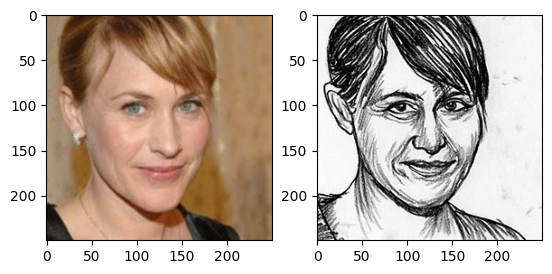

In [146]:
#Check that the 2nd photo corresponds to the 2nd sketch
plt.subplot(1,2,1)
plt.imshow(photo_array[1000])

plt.subplot(1,2,2)
plt.imshow(sketch_array[1000])

plt.show